In [39]:
# Import the Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

In [11]:
# Load the Data
DATA_PATH = "Stars.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [13]:
# Basic Structure and Sanity Check
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [23]:
# Clean the data
FEATURE_COLS = [
    "Temperature (K)",
    "Luminosity(L/Lo)",
    "Radius(R/Ro)",
    "Absolute magnitude(Mv)"
]

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Basic cleaning:
    - Select numerical astrophysical features
    - Drop missing values
    """
    df = df.copy()
    df = df.dropna(subset=FEATURE_COLS)
    return df

df_clean = clean_data(df)
df_clean.isnull().sum()
df_clean.shape

(240, 7)

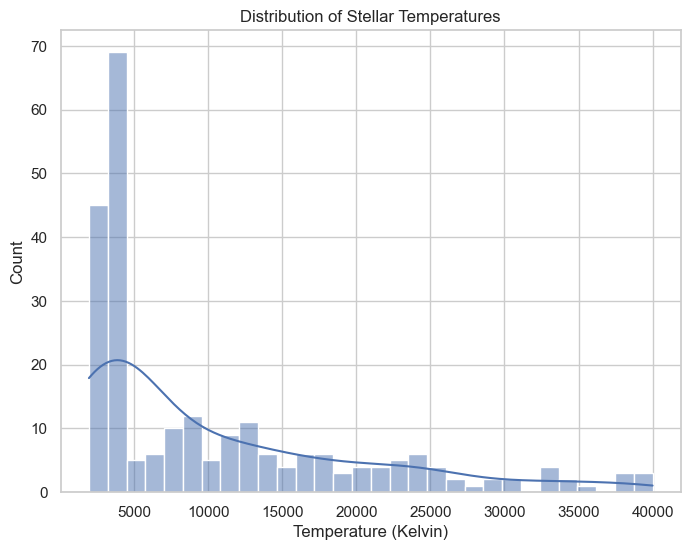

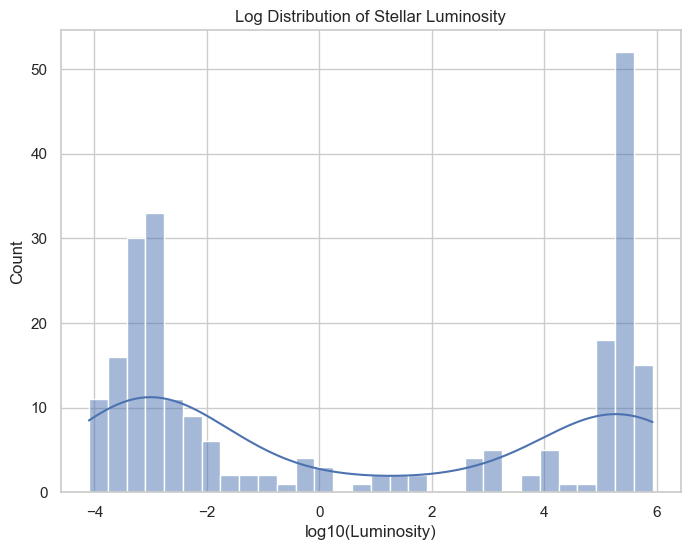

In [25]:
# Distribution of Key Features

# Temperature
sns.histplot(df_clean["Temperature (K)"], bins=30, kde=True)
plt.title("Distribution of Stellar Temperatures")
plt.xlabel("Temperature (Kelvin)")
plt.show()

# Luminosity
sns.histplot(np.log10(df_clean["Luminosity(L/Lo)"]), bins=30, kde=True)
plt.title("Log Distribution of Stellar Luminosity")
plt.xlabel("log10(Luminosity)")
plt.show()


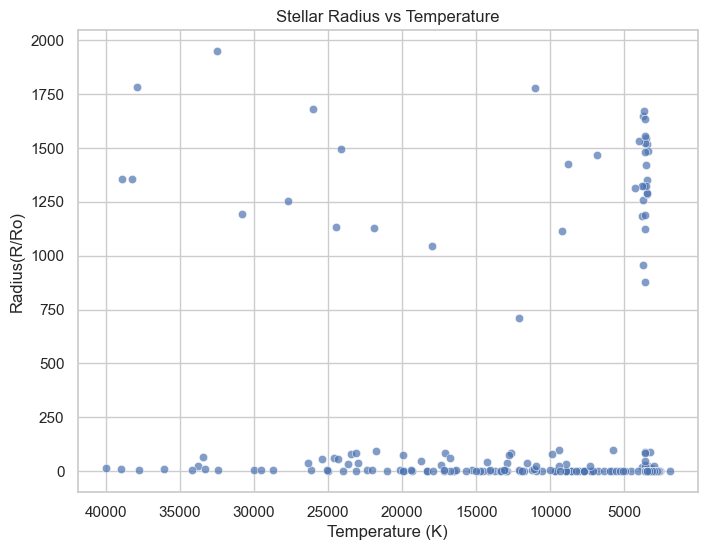

In [27]:
# Radius vs Temperature
sns.scatterplot(
    x="Temperature (K)",
    y="Radius(R/Ro)",
    data=df_clean,
    alpha=0.7
)
plt.title("Stellar Radius vs Temperature")
plt.gca().invert_xaxis()
plt.show()

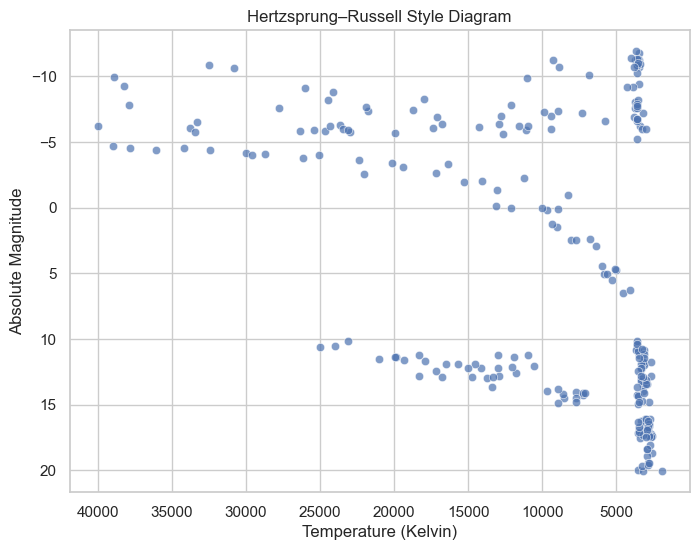

In [31]:
# The Hertzsprung–Russell–Style View

sns.scatterplot(
    x="Temperature (K)",
    y="Absolute magnitude(Mv)",
    data=df_clean,
    alpha=0.7
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Hertzsprung–Russell Style Diagram")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Absolute Magnitude")
plt.show()


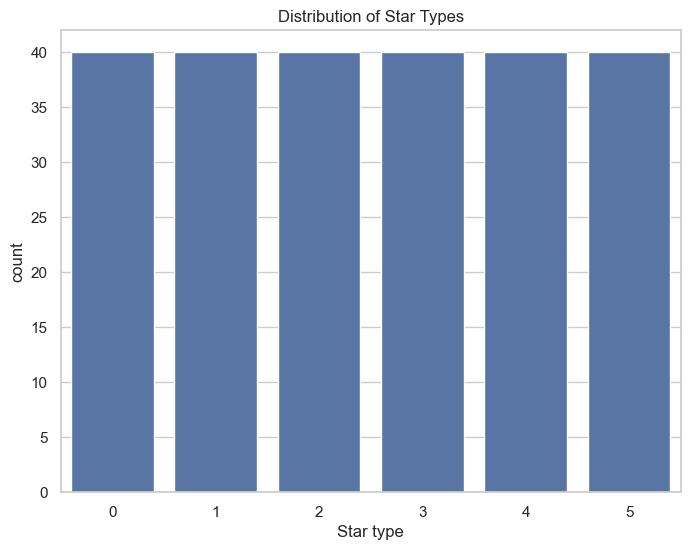

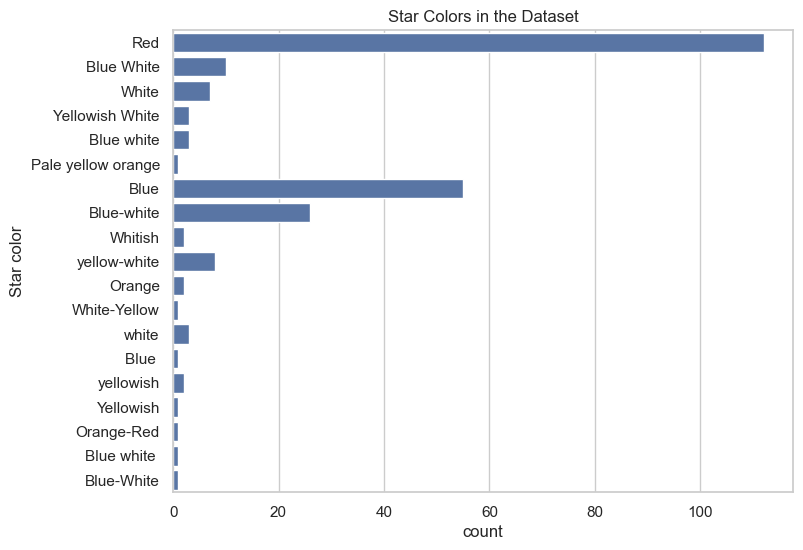

In [33]:
# Star Types and Color
if "Star type" in df_clean.columns:
    sns.countplot(x="Star type", data=df_clean)
    plt.title("Distribution of Star Types")
    plt.show()

if "Star color" in df_clean.columns:
    sns.countplot(y="Star color", data=df_clean)
    plt.title("Star Colors in the Dataset")
    plt.show()


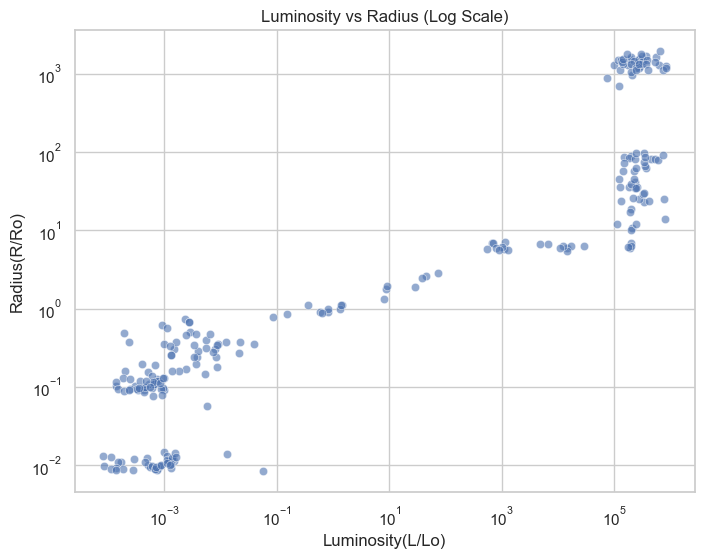

In [35]:
# Selective Parwise Relationship
sns.scatterplot(
    x="Luminosity(L/Lo)",
    y="Radius(R/Ro)",
    data=df_clean,
    alpha=0.6
)
plt.xscale("log")
plt.yscale("log")
plt.title("Luminosity vs Radius (Log Scale)")
plt.show()
